In [24]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import pandas as pd
import numpy as np
from citipy import citipy
from random import uniform
from api_keys import weather_api_key

In [25]:
#base url
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
#create list for location
locations=[]
cities=[]
#random lat & long
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
long = np.random.uniform(low=-180.000, high=180.000, size=1600)
locations = zip(lats, long)

#find the cities' name
for location in locations:
    city = citipy.nearest_city(location[0], location[1]).city_name
    
    # add city to the list
    if city not in cities:
        cities.append(city)

#print
print(len(cities))

613


In [49]:
#list for data record
lat = []
lngs=[]
temp = []
max_temps=[]
humi=[]
cloud=[]
wind=[]
city_name=[]
country=[]
#loop through city to collect data
for city in cities:
    #use try to keep the data of cities were found
        try:
            response = requests.get(url + "&q="+city).json()
            lat.append(response['coord']['lat'])
            lngs.append(response['coord']['lon'])
            temp.append(response['main']['temp'])
            max_temps.append(response['main']['temp_max'])
            humi.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            city_name.append(response['name'])
            country.append(response['sys']['country'])
        except KeyError:
            pass
        continue

In [50]:
#create dataframe
weather_data = {"City": city_name,"Country":country,"lat": lat,"lng":lngs,"temp": temp,"max temp":max_temps,"humidity":humi,"cloud":cloud,"wind speed":wind}
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Country,lat,lng,temp,max temp,humidity,cloud,wind speed
0,Yellowknife,CA,62.46,-114.35,22.73,23.00,73,90,9.17
1,Vaini,TO,-21.20,-175.20,71.60,71.60,78,90,5.82
2,Xam Nua,LA,20.42,104.04,70.92,70.92,58,90,4.29
3,Cape Town,ZA,-33.93,18.42,59.50,63.00,67,0,13.87
4,Pindamonhangaba,BR,-22.92,-45.46,61.00,61.00,95,9,0.72


In [30]:
#set x and y
x_axis=weather_df["lat"]
temp_data=weather_df["temp"]
hum_data=weather_df["humidity"]
cloud_data=weather_df["cloud"]
wind_data=weather_df["wind speed"]

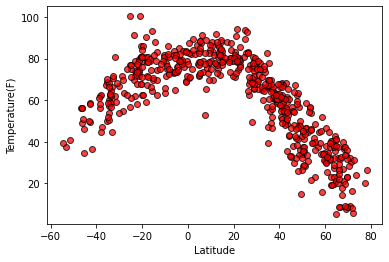

In [31]:
#scatter plot on lat vs temp
plt.scatter(x_axis, temp_data, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
#save png
plt.savefig("Image/lat_temp.png")
#show plot
plt.show()

#Based on the picture, the city is more closer to the equator, the high temperature it has; the city is more far away from the equator, the lower temperature it has.

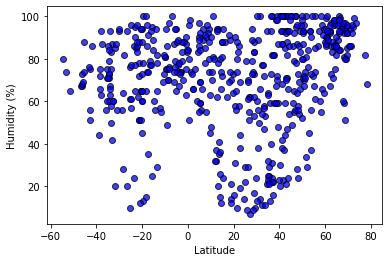

In [32]:
#scatter plot lat vs humidity
plt.scatter(x_axis, hum_data, marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#save png
plt.savefig("Image/lat_humi.png")
#show plot
plt.show()

#Based on the picture, this dataset shows in Northern Hemisphere the more far away from the equator, the more humidity it is. But in Southern Hemisphere the more far away from the equator, the less humidity it is

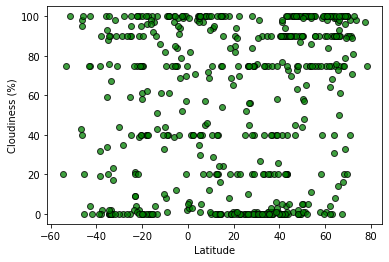

In [33]:
#scatter plot lat vs cloudiness
plt.scatter(x_axis, cloud_data, marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#save png
plt.savefig("Image/lat_cloud.png")
#show plot
plt.show()

#Based on the picture, the data is spreaded out. The latitude has little impact on cloudiness

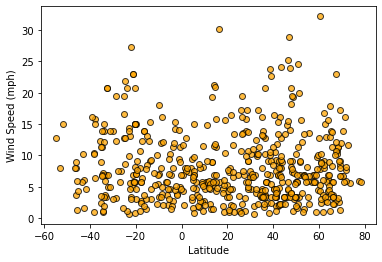

In [34]:
#scatter plot lat vs wind speed
plt.scatter(x_axis, wind_data, marker="o", facecolors="orange", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#save png
plt.savefig("Image/lat_wind.png")
#show plot
plt.show()

#Based on the picture, in Southern Hemisphere,the data is spreaded out and in Northern Hemisphere, the data is almost gathering between 0-15 no matter what latitude it is located. The latitude has little impact on wind speed as well.

In [35]:
#create bin
bins = [-90,0,90]
group_names = ["Southern Hemisphere", "Northern Hemisphere"]
#organize by hemisphere 
weather_df["Hemisphere"] = pd.cut(weather_df["lat"], bins, labels=group_names)

In [36]:
#northern hemisphere
north_table = weather_df.loc[weather_df["Hemisphere"] == "Northern Hemisphere"]
#set variables
lat_north=north_table["lat"]
temp_north=north_table["temp"]
humi_north=north_table["humidity"]
cloud_north=north_table["cloud"]
wind_north=north_table["wind speed"]

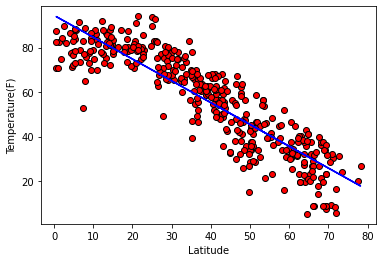

<Figure size 432x288 with 0 Axes>

In [37]:
#linear regression:lat vs temp
temp_model = st.linregress(north_table['lat'],north_table['temp'])
y_temp = north_table['lat']*temp_model[0]+temp_model[1]
plt.scatter(lat_north,temp_north, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.plot(north_table['lat'],y_temp,color="blue")
plt.show()
#save png
plt.savefig("Image/north_lat_temp.png")

The more away from the equator, the lower the temperature will be

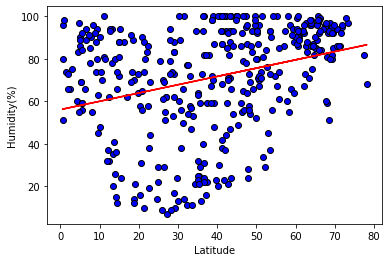

<Figure size 432x288 with 0 Axes>

In [38]:
#linear regression:lat vs humidity
humi_model = st.linregress(north_table['lat'],north_table['humidity'])
y_humi = north_table['lat']*humi_model[0]+humi_model[1]
plt.scatter(lat_north,humi_north, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(north_table['lat'],y_humi,color="red")
plt.show()
#save png
plt.savefig("Image/north_lat_humi.png")

The larger the latitude is, the more humidity it could be.

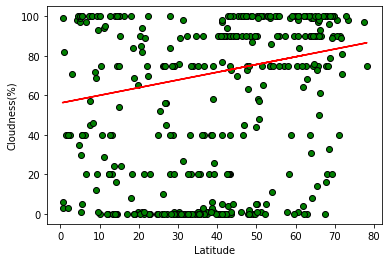

<Figure size 432x288 with 0 Axes>

In [39]:
#linear regression:lat vs cloudiness
cloud_model = st.linregress(north_table['lat'],north_table['cloud'])
y_cloud = north_table['lat']*cloud_model[0]+cloud_model[1]
plt.scatter(lat_north,cloud_north, marker="o", facecolors="green", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.plot(north_table['lat'],y_humi,color="red")
plt.show()
#save png
plt.savefig("Image/north_lat_cloud.png")

The larger the latitude is, the more cloud it could gather.

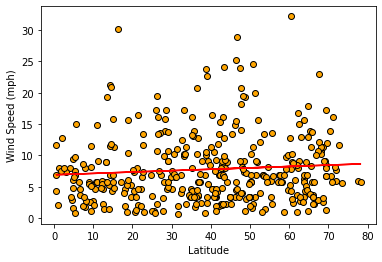

<Figure size 432x288 with 0 Axes>

In [40]:
#linear regression:lat vs wind
wind_model = st.linregress(north_table['lat'],north_table['wind speed'])
y_wind = north_table['lat']*wind_model[0]+wind_model[1]
plt.scatter(lat_north,wind_north, marker="o", facecolors="orange", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(north_table['lat'],y_wind,color="red")
plt.show()
#save png
plt.savefig("Image/north_lat_wind.png")

Wind speed has little related with latitude in Northern Hemisphere.

In [41]:
#southern hemisphere
south_table = weather_df.loc[weather_df["Hemisphere"] == "Southern Hemisphere"]
#set variables
lat_south=south_table["lat"]
temp_south=south_table["temp"]
humi_south=south_table["humidity"]
cloud_south=south_table["cloud"]
wind_south=south_table["wind speed"]

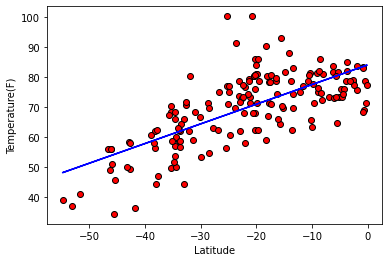

<Figure size 432x288 with 0 Axes>

In [42]:
#linear regression:lat vs temp
stemp_model = st.linregress(south_table['lat'],south_table['temp'])
y_stemp = south_table['lat']*stemp_model[0]+stemp_model[1]
plt.scatter(lat_south,temp_south, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.plot(south_table['lat'],y_stemp,color="blue")
plt.show()
#save png
plt.savefig("Image/south_lat_temp.png")

The closer to the equator, the higher the temperature will be

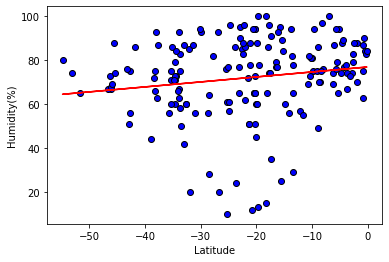

<Figure size 432x288 with 0 Axes>

In [43]:
#linear regression:lat vs humidity
shumi_model = st.linregress(south_table['lat'],south_table['humidity'])
y_shumi = south_table['lat']*shumi_model[0]+shumi_model[1]
plt.scatter(lat_south,humi_south, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(south_table['lat'],y_shumi,color="red")
plt.show()
#save png
plt.savefig("Image/south_lat_humi.png")

The closer to the equator, the more humidity tend to be. The relations between latitude and humidity is weaker than Northern Hemisphere.

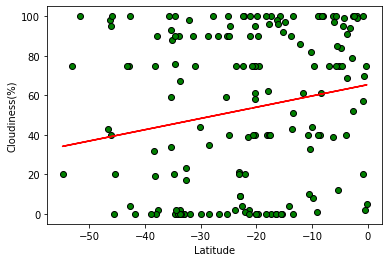

<Figure size 432x288 with 0 Axes>

In [44]:
#linear regression:lat vs cloudiness
scloud_model = st.linregress(south_table['lat'],south_table['cloud'])
y_scloud = south_table['lat']*scloud_model[0]+scloud_model[1]
plt.scatter(lat_south,cloud_south, marker="o", facecolors="green", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.plot(south_table['lat'],y_scloud,color="red")
plt.show()
#save png
plt.savefig("Image/south_lat_cloud.png")

Same as humidity: The closer to the equator, the more cloudy will be. 

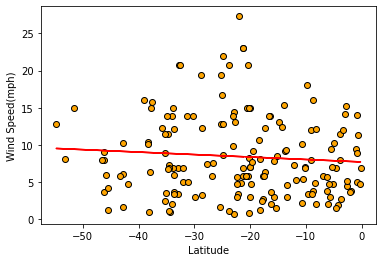

<Figure size 432x288 with 0 Axes>

In [45]:
#linear regression:lat vs wind speed
sspeed_model = st.linregress(south_table['lat'],south_table['wind speed'])
y_swind = south_table['lat']*sspeed_model[0]+sspeed_model[1]
plt.scatter(lat_south,wind_south, marker="o", facecolors="orange", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.plot(south_table['lat'],y_swind,color="red")
plt.show()
#save png
plt.savefig("Image/south_lat_wind.png")

The closer to the equator, the wind speed tend to be slower. The relations between wind speed and latitude is stronger than Norther Hemisphere

In [51]:
#output csv
weather_df.to_csv("Output_data/weather.csv", index=False, header=True)